In [88]:
from pylab import *
import numpy as np
import warnings
import matplotlib.pyplot as plt
import scipy.integrate as quad
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 40

$$\displaystyle{\text{Classical expression of Hamiltonian of a system is }: \ \ H(q,p)=\frac{kq^2}{2}+\frac{p^2}{2m}}$$

$\displaystyle{\text{Space coordinate }: q=A\cos(\omega t+\phi),  \qquad\text{Momentum coordinate }: p=m\dot{q}=-m\omega A \sin(\omega t+\phi), \qquad A\text{ being the amplitude and } \omega\text{ is the frequency of vibration}\\ \omega=\sqrt{k/m}=>k=m\omega^2 }$

$\displaystyle{H(q,p)=\frac{kq^2}{2}+\frac{p^2}{2m}= \frac{m\omega^2A^2\cos^2(\omega t+\phi)}{2}+\frac{m\omega^2 A^2 \sin^2(\omega t+\phi)}{2}=\frac{m\omega^2A^2}{2} \Big(\cos^2(\omega t+\phi)+\sin^2(\omega t+\phi)\Big)=\frac{m\omega^2A^2}{2}=E}$

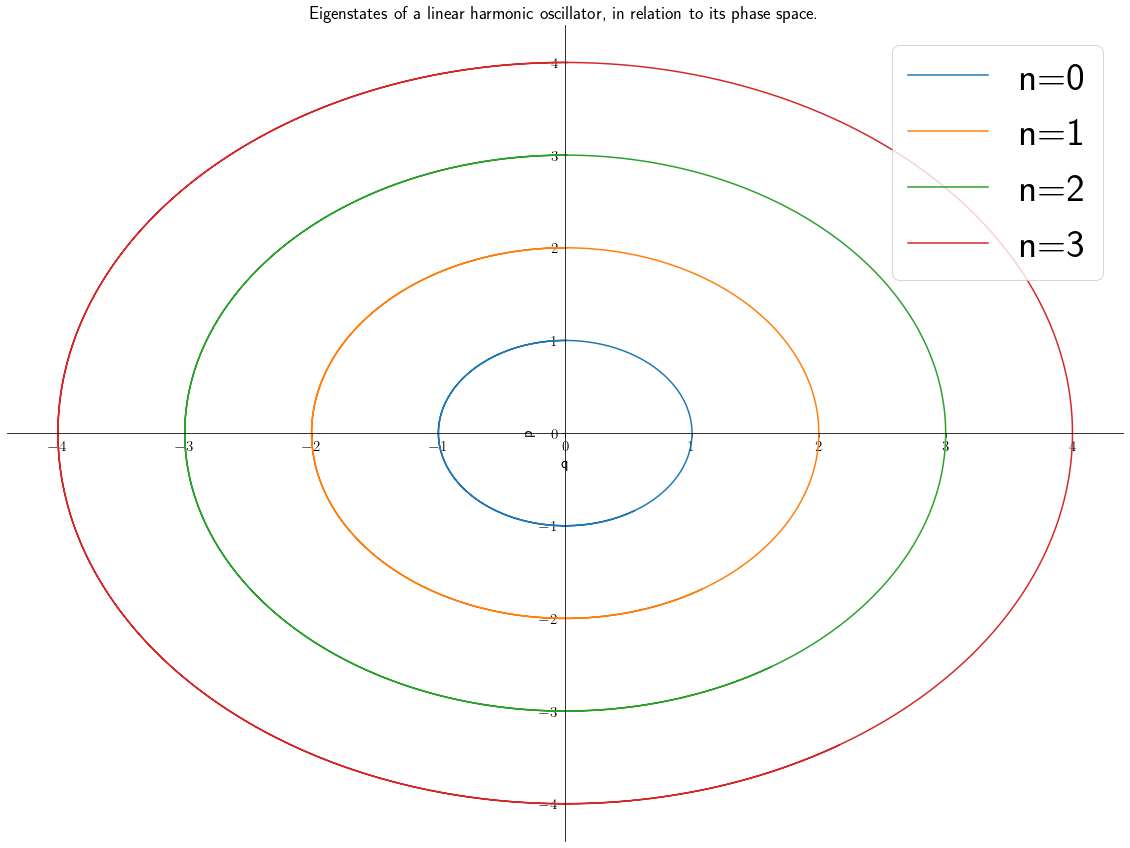

In [29]:
def q(t):
    return A*np.cos(w*t+phi)

def p(t):
    return -m*w*A*np.sin(w*t+phi)

k,m,phi=1,1,1
w=(k/m)**0.5
t=np.linspace(0,10,1000)
A= [ 1, 2 , 3, 4]
subplot(111)
for A in A:
    plt.plot(q(t),p(t),label='n=%i'%(A-1))
ax = gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_xlabel('q')
ax.set_ylabel('p')
plt.legend(loc='upper right')
plt.title('Eigenstates of a linear harmonic oscillator, in relation to its phase space.')
plt.show()

In [30]:
def cosh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez + enz)/2 

def tanh(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez - enz)/(ez + enz) 

def sech(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return 2/(ez + enz)

def coth(z):
    ez = np.exp(z)
    enz = np.exp(-z)
    return (ez + enz)/(ez - enz)

# Langevin function:$$L(x)=\coth x-\frac{1}{x}$$

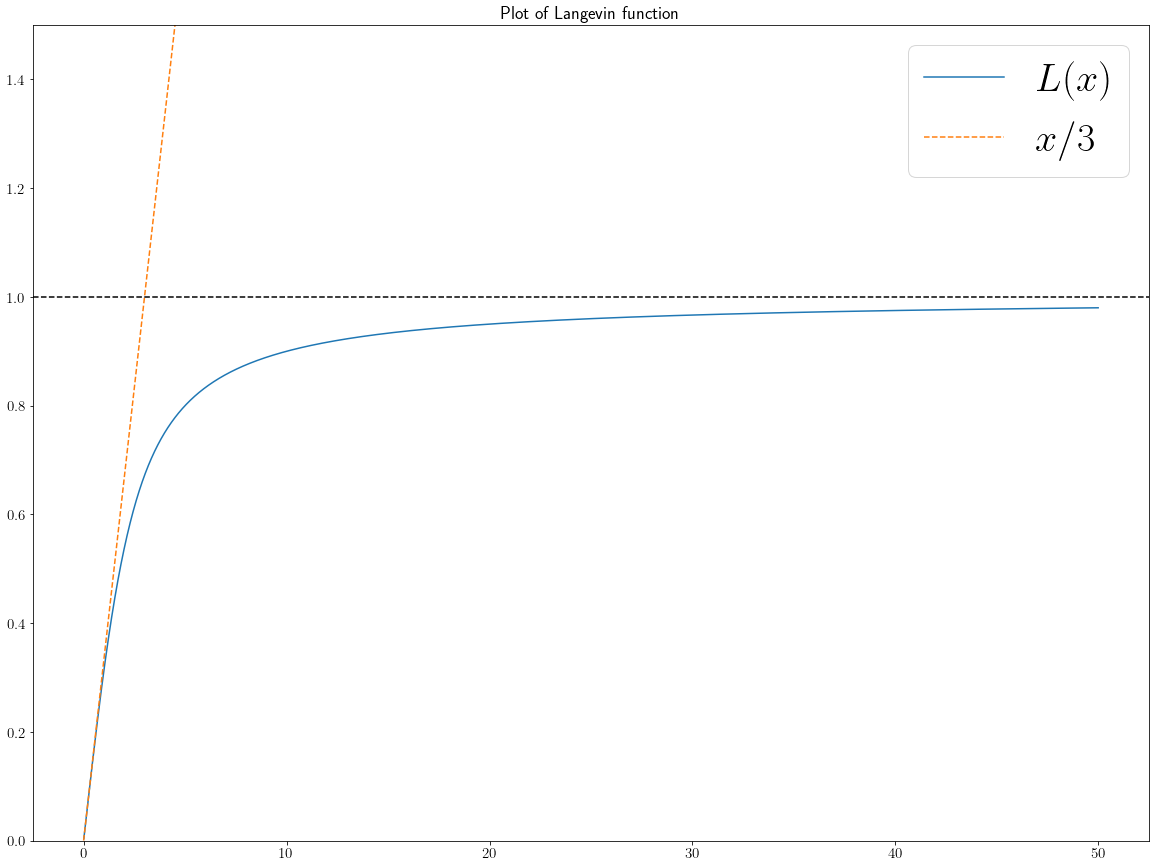

In [31]:
def Langevin(x):
    return coth(x)-(1/x)

x=np.arange(0,50,0.01)
plt.plot(x,Langevin(x),label=r'$L(x)$')
plt.plot(x,x/3,'--',label=r'$x/3$')
plt.legend()
plt.ylim(0,1.5)
plt.axhline(y=1.0, color="black", linestyle="--")
plt.title('Plot of Langevin function')
plt.show()

# Brillouin function $\displaystyle{B_J(x)}$ of order $J$: $$\displaystyle{B_J(x)=\Big(1+\frac{1}{2J}\Big)\coth\Big\{\Big(1+\frac{1}{2J}\Big)x\Big\}-\frac{1}{2J}\coth\Big\{\frac{1}{2J}x\Big\}}$$

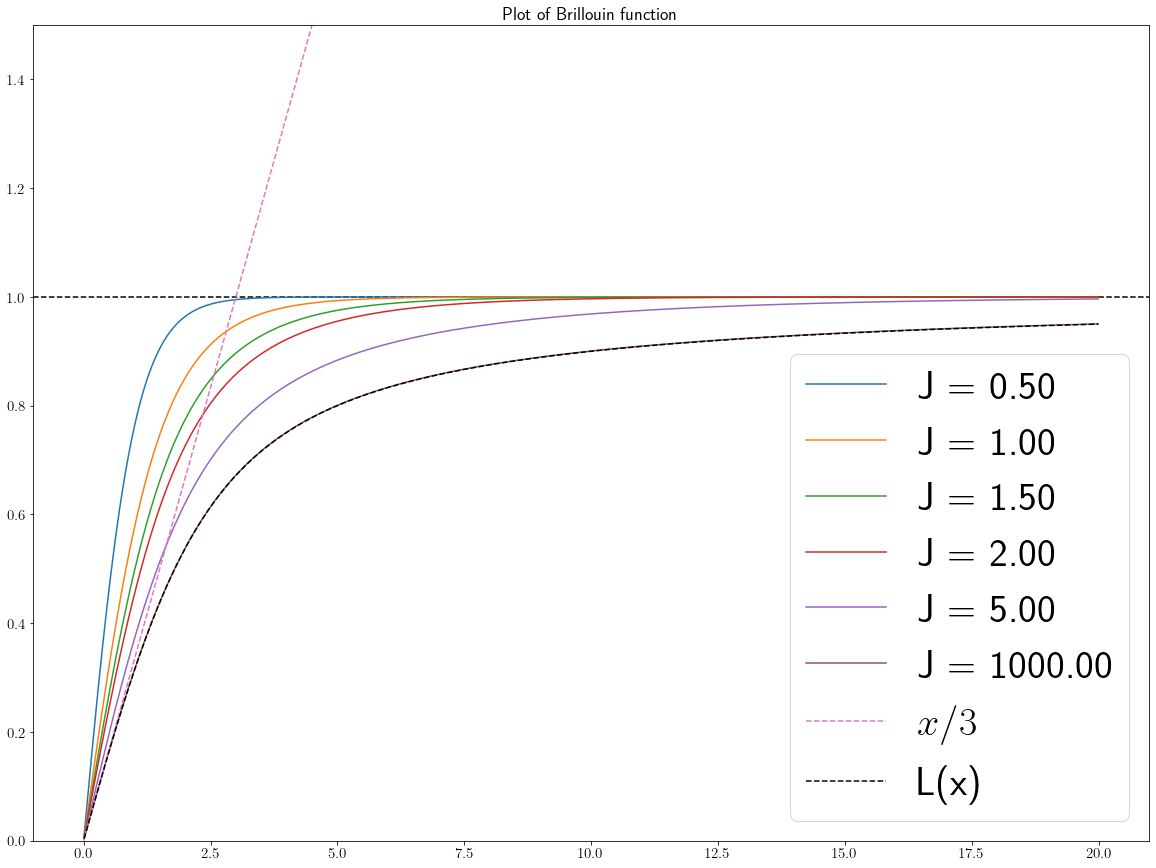

In [41]:
def Brillouin(J,x):
    return (1+(1/(2*J)))*coth((1+(1/(2*J)))*x)-(1/(2*J))*coth((1/(2*J))*x)

x=np.arange(0,20,0.01)
J1=[1/2, 1, 3/2, 2, 5, 1000]

plt.axhline(y=1.0, color="black", linestyle="--")

for J in J1:
    plt.plot(x,Brillouin(J,x), label=' J = %0.2f'%J)
plt.plot(x,x/3,'--',label=r'$x/3$')  
plt.plot(x,Langevin(x),'k--',label='L(x)')
plt.legend()    
plt.ylim(0,1.5)
plt.title('Plot of Brillouin function')
plt.show()

From the graphical view we can conclude that as $J \rightarrow\infty \qquad B_J(x)\rightarrow L(x)$ 

# $$\displaystyle{\textbf{Thermodynamics of magnetic a systems in negative temperatures}}$$

Consider a system of dipoles with spins $J=\frac{1}{2}$ and no. of possible orientation $g=2$ .                             
It has two orientations, the corresponding energies being $\displaystyle{-\mu_o\mu_BH}$ and $\displaystyle{+\mu_o\mu_BH}$;                               
let us call these energies $-\epsilon$ and $+\epsilon$ ; $\displaystyle{i.e. \ \  \epsilon=\mu_o\mu_BH \qquad \beta=\frac{1}{kT}}$.

$$\displaystyle{\text{Partition function of the system,} Q_N(\beta)=(e^{\beta\epsilon}+e^{-\beta\epsilon})^N=\{ \cosh(\beta\epsilon)  \}  \qquad\qquad\qquad\quad-(1}$$

$$\displaystyle{\text{Helmholtz free energy, }  A=-kT\ln Q_N(\beta)=-NkT\ln\Big\{2\cosh\big(\frac{\epsilon}{kT}\big)\Big\},\qquad\qquad\qquad-(2}      $$
from which                                                                                              
 $$\displaystyle{\text{Entropy, }S=-\Big(\frac{\partial A}{\partial T}\Big)_H= Nk\Big[\ln\Big\{2\cosh\big(\frac{\epsilon}{kT}\big)\Big\}-\frac{\epsilon}{kT}\tanh\big(\frac{\epsilon}{kT}\big)\Big]\qquad\qquad\qquad \ -(3  }$$
 
 $$\displaystyle{\text{Internal Energy, }U=A+TS=-N\epsilon\tanh\big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad\qquad\qquad\qquad\qquad-(4    }$$
 
 $$\displaystyle{\text{Magnetization, }M=\frac{1}{\mu_o}\Big(\frac{\partial A}{\partial H}\Big)_T = N\mu_B \tanh \big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad \qquad \qquad\quad\qquad-(5}$$
 
 $$\displaystyle{\text{Specific heat of the system, } C=\Big(\frac{\partial U}{\partial T}\Big)_H=Nk\big(\frac{\epsilon}{kT}\big)^2  \text{sech}^2\big(\frac{\epsilon}{kT}\big)\qquad\qquad\qquad\quad \ -(6}$$
 
 So let us consider $\displaystyle{x=\frac{kT}{\epsilon}}$, so then
 $$\displaystyle{\frac{S}{Nk}= \ln\Big\{2\cosh\big(\frac{1}{x}\big)\Big\}-\frac{\tanh\big(\frac{1}{x}\big)}{x}}$$
 
 $$\displaystyle{\frac{U}{N\epsilon}=-\tanh\big(\frac{1}{x}\big)}$$
 
 $$\displaystyle{\frac{M}{N\mu_B}=  \tanh \big(\frac{1}{x}\big)}$$
 
 $$\displaystyle{\frac{C}{Nk}=\Big(\frac{\text{sech}\big(\frac{1}{x}\big)}{x}\Big)^2}$$

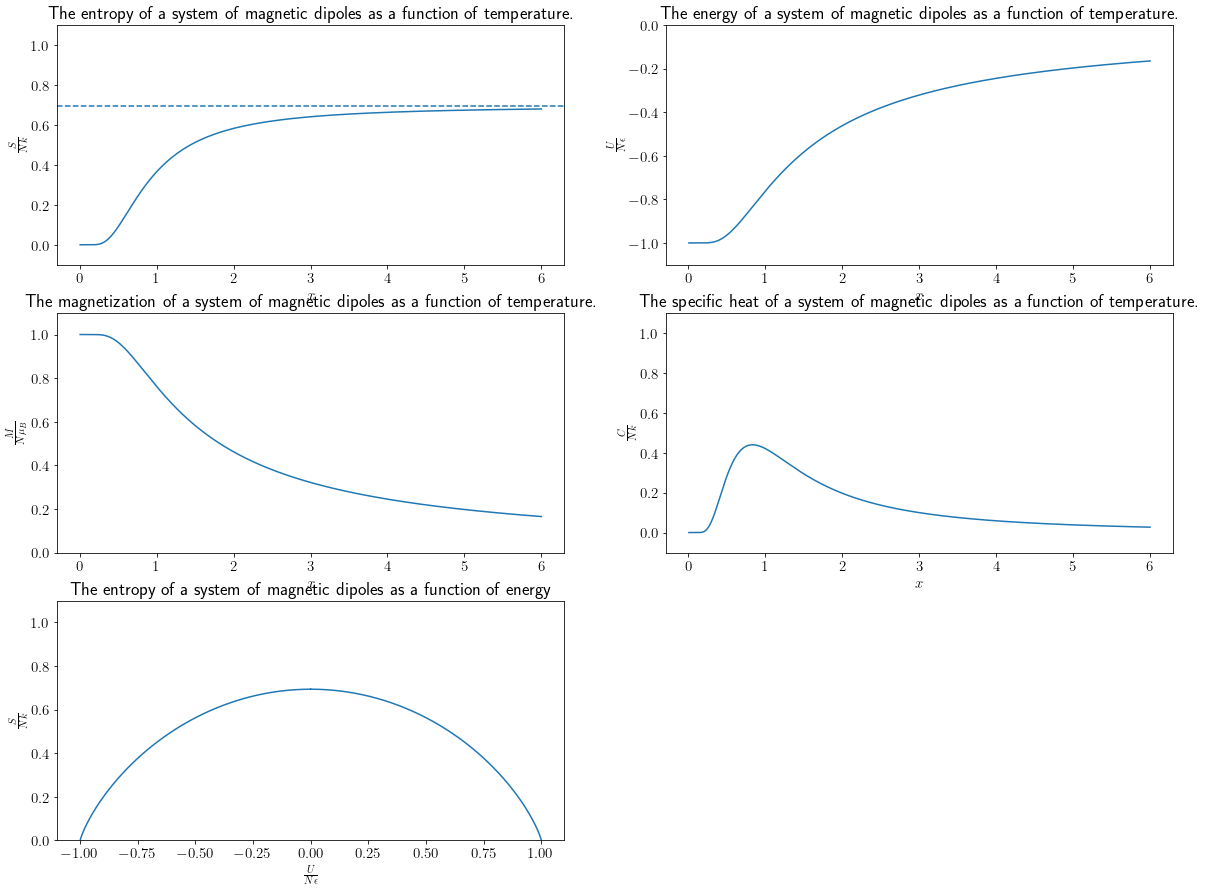

In [34]:
x=np.linspace(0,6,1000)

def S_Nk(x):
    return np.log(2*cosh(1/x))-(1/x)*tanh(1/x)

def U_NE(x):
    return -tanh(1/x)

def M_Nu(x):
    return tanh(1/x)

def C_Nk(x):
    return (sech(1/x)/x)**2

plt.subplot(321)
plt.plot(x, S_Nk(x))
plt.axhline(np.log(2),linestyle='--')
plt.title('The entropy of a system of magnetic dipoles as a function of temperature.')
plt.ylabel(r'$\frac{S}{Nk}$')
plt.xlabel(r'$x$')
plt.ylim(-0.1,1.1)

plt.subplot(322)
plt.plot(x, U_NE(x))
plt.title('The energy of a system of magnetic dipoles as a function of temperature.')
plt.ylabel(r'$\frac{U}{N\epsilon}$')
plt.xlabel(r'$x$')
plt.ylim(-1.1,0)

plt.subplot(323)
plt.plot(x, M_Nu(x))
plt.title('The magnetization of a system of magnetic dipoles as a function of temperature.')
plt.ylabel(r'$\frac{M}{N\mu_B}$')
plt.xlabel(r'$x$')
plt.ylim(0,1.1)

plt.subplot(324)
plt.plot(x, C_Nk(x))
plt.title('The specific heat of a system of magnetic dipoles  as a function of temperature.')
plt.ylabel(r'$\frac{C}{Nk}$')
plt.xlabel(r'$x$')
plt.ylim(-0.1,1.1)

x=np.linspace(-1001,1001,1000001)
plt.subplot(325)
plt.plot(U_NE(x),S_Nk(x))
plt.title('The entropy of a system of magnetic dipoles as a function of energy')
plt.xlabel(r'$\frac{U}{N\epsilon}$')
plt.ylabel(r'$\frac{S}{Nk}$')
plt.ylim(0,1.1)
plt.xlim(-1.1,1.1)
plt.show()

##  Equilibrium of the Einstein crystal

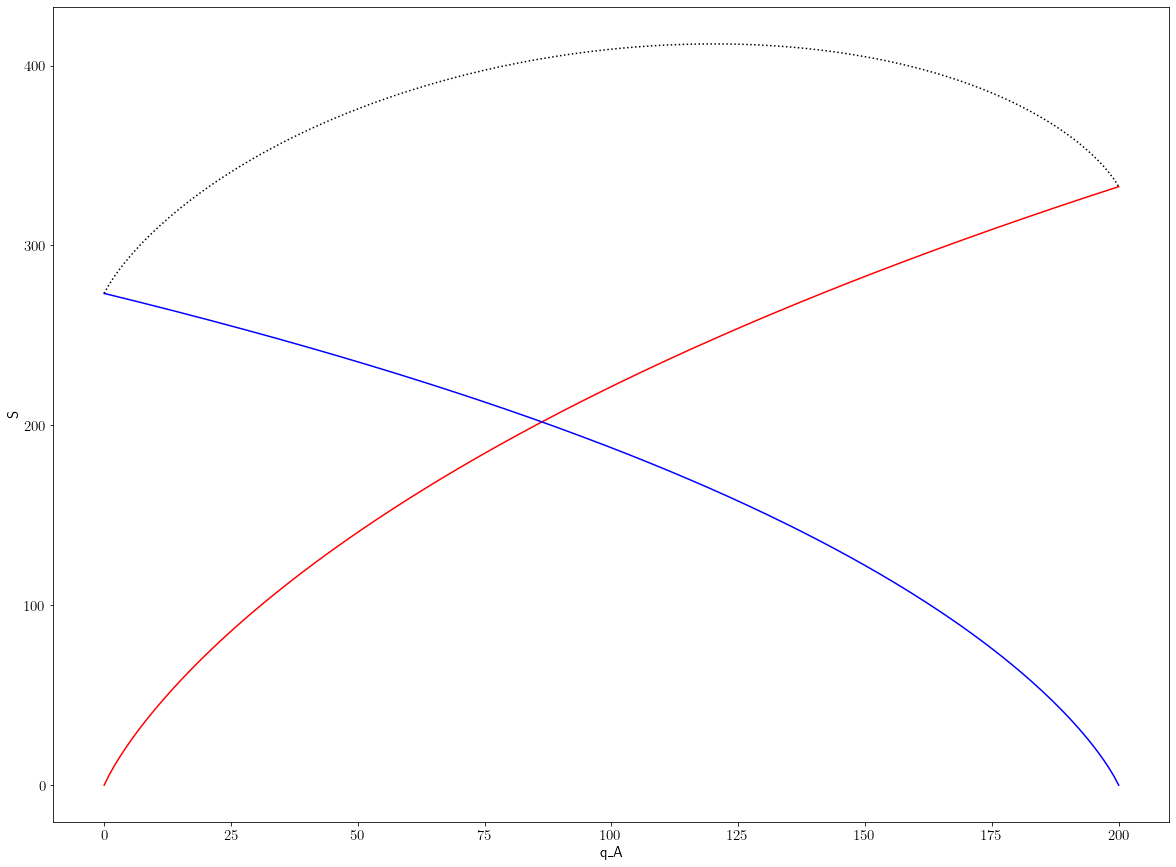

In [21]:
from pylab import *
from scipy.special import comb 
NA = 300
NB = 200
q = 200
multA = zeros(q+1,float)
multB = zeros(q+1,float)
mult = zeros(q+1,float)
N = NA + NB
qvalue = array(range(q+1))
for ik in range(len(qvalue)):
    qA = qvalue[ik]
    qB = q - qA
    multA[ik] = comb(qA+NA-1,qA)
    multB[ik] = comb(qB+NB-1,qB)
    mult[ik] = multA[ik]*multB[ik]
SA = log(multA)
SB = log(multB)
STOT = SA + SB
plot(qvalue,SA,'-r',qvalue,SB,'-b',qvalue,STOT,':k')
xlabel('q_A')
ylabel('S')
show()

## E

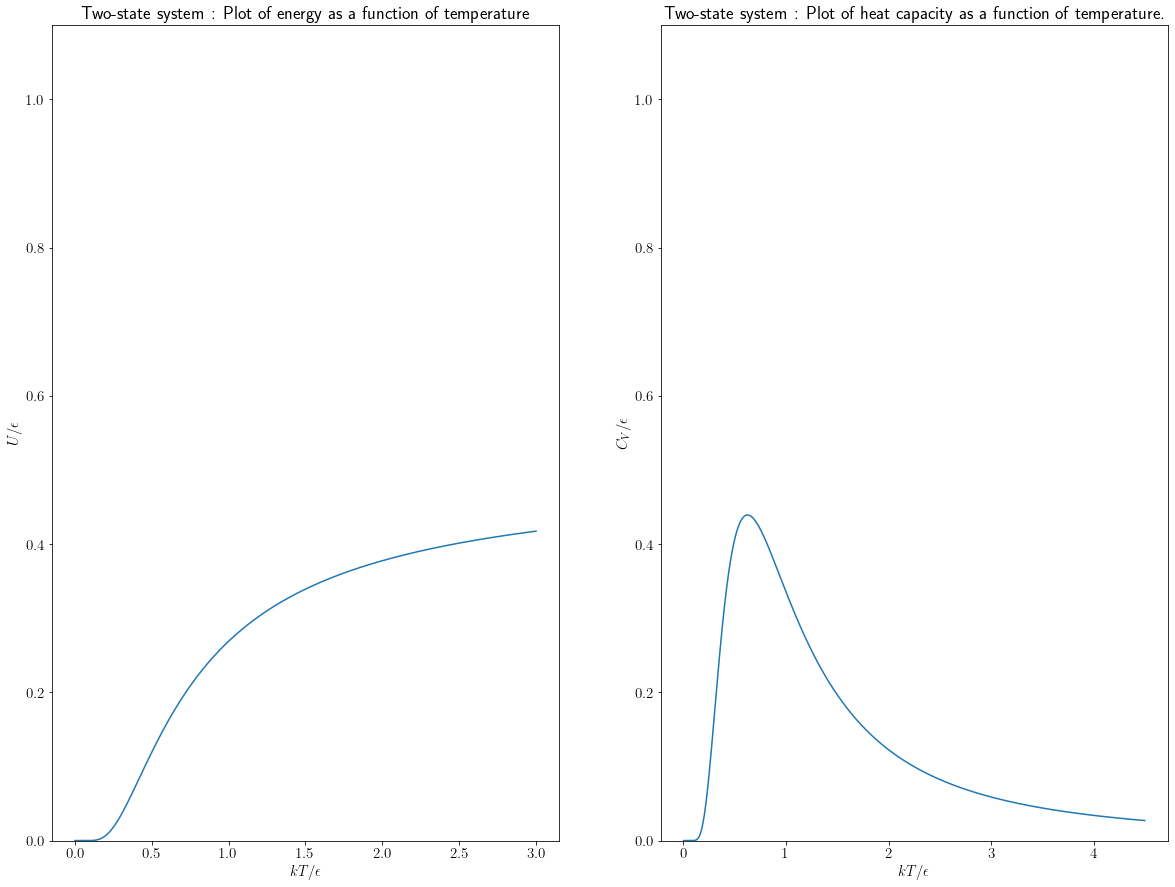

In [24]:
x = np.linspace(0,3,1000)
E = np.exp(-1/x)/(1+np.exp(-1/x))
plt.subplot(121)
plt.plot(x,E)
plt.title('Two-state system : Plot of energy as a function of temperature')
plt.xlabel(r'$kT/\epsilon$')
plt.ylabel(r'$U/\epsilon$')
plt.ylim(0,1.1)

CV = np.diff(E)/np.diff(x)
xmid = 0.5*(x[1:])+x[0:-1]
plt.subplot(122)
plt.plot(xmid,CV)
plt.title('Two-state system : Plot of heat capacity as a function of temperature.')
plt.xlabel(r'$kT/\epsilon$')
plt.ylabel(r'$C_V/\epsilon$')
plt.ylim(0,1.1)
plt.show()

In [9]:
h = 6.626e-34              # Plank's const
c = 3.0e+8                 # speed of light
k = 1.38e-23               # Boltzmann constant (joule per kelvin)
e = 1.6e-19                # charge of electron
E = 0.01

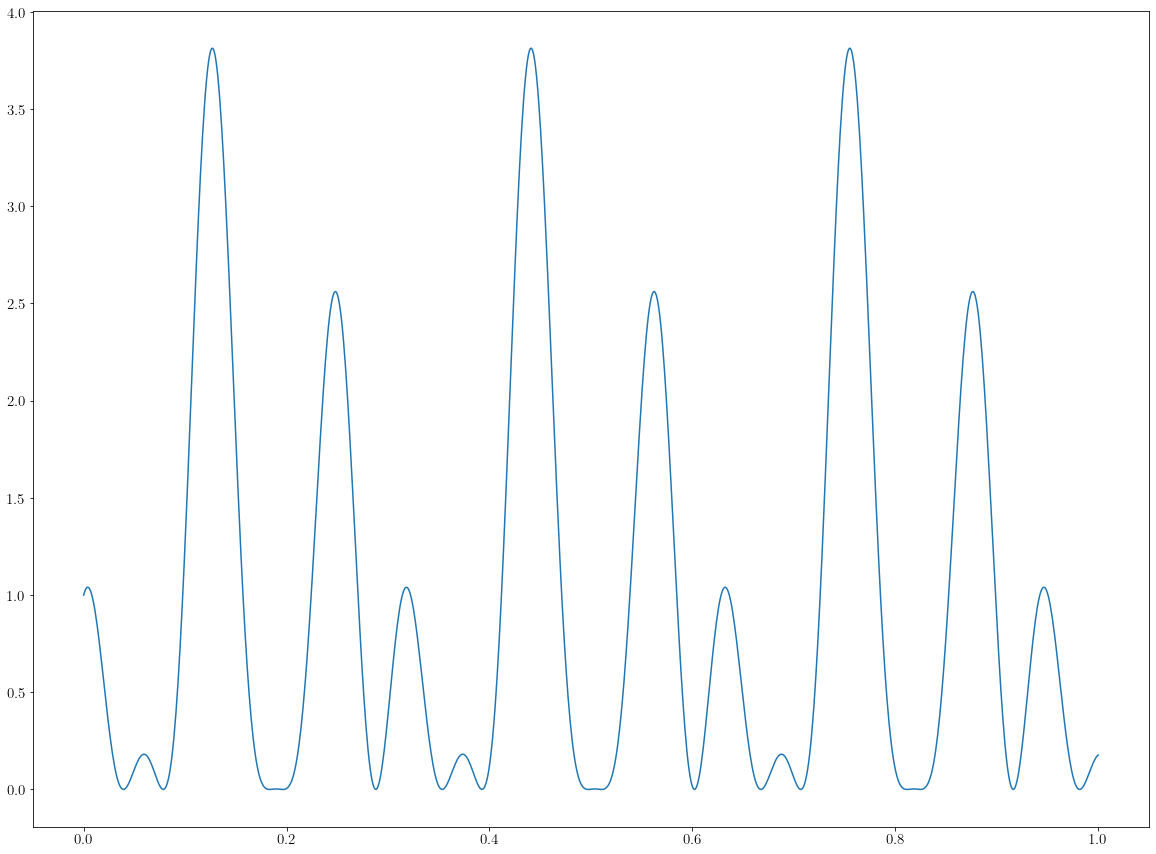

In [10]:
from pylab import *
from pylab import plot as plt
from sympy import *
u = symbols('u')
f = (sin(10*u)+cos(50*u))**2
g=integrate(f)
fint = float(g.subs(u,1))
# Convert to Python function
fun = lambdify(u,f,"numpy")
# Plot f(x)
xx = linspace(0,1,1000)
yy = fun(xx)
plt(xx,yy)

Text(0, 0.5, 'I')

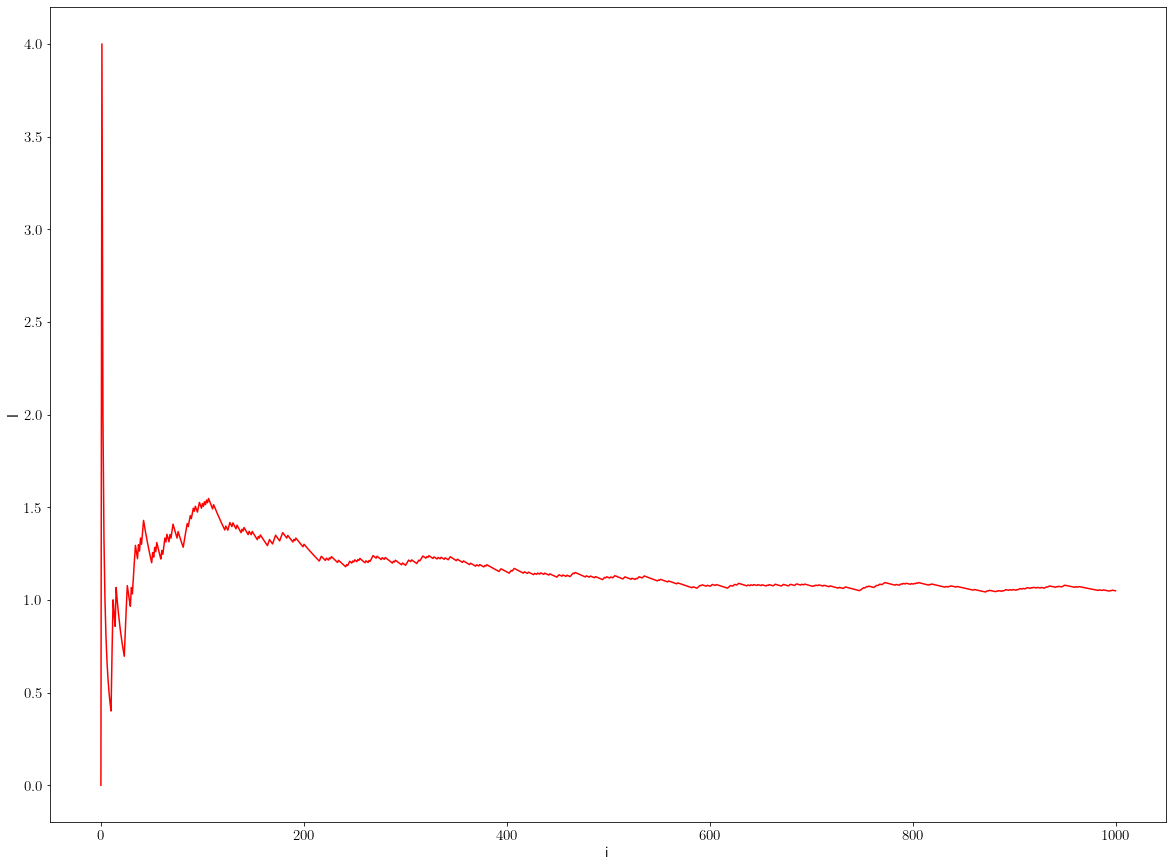

In [11]:
fmax = 4.0 # Upper limit of f(x) for x (0,1)
N = 1000
hit = 0.
intest = np.zeros((N,1),float)
for i in range(1,N):
    x = rand(1); y = rand(1)*fmax
    if (y<fun(x)):
        hit = hit + 1
    intest[i] = hit/i*fmax
plt(array(range(0,N)),intest,'-r')
xlabel('i')
ylabel('I')

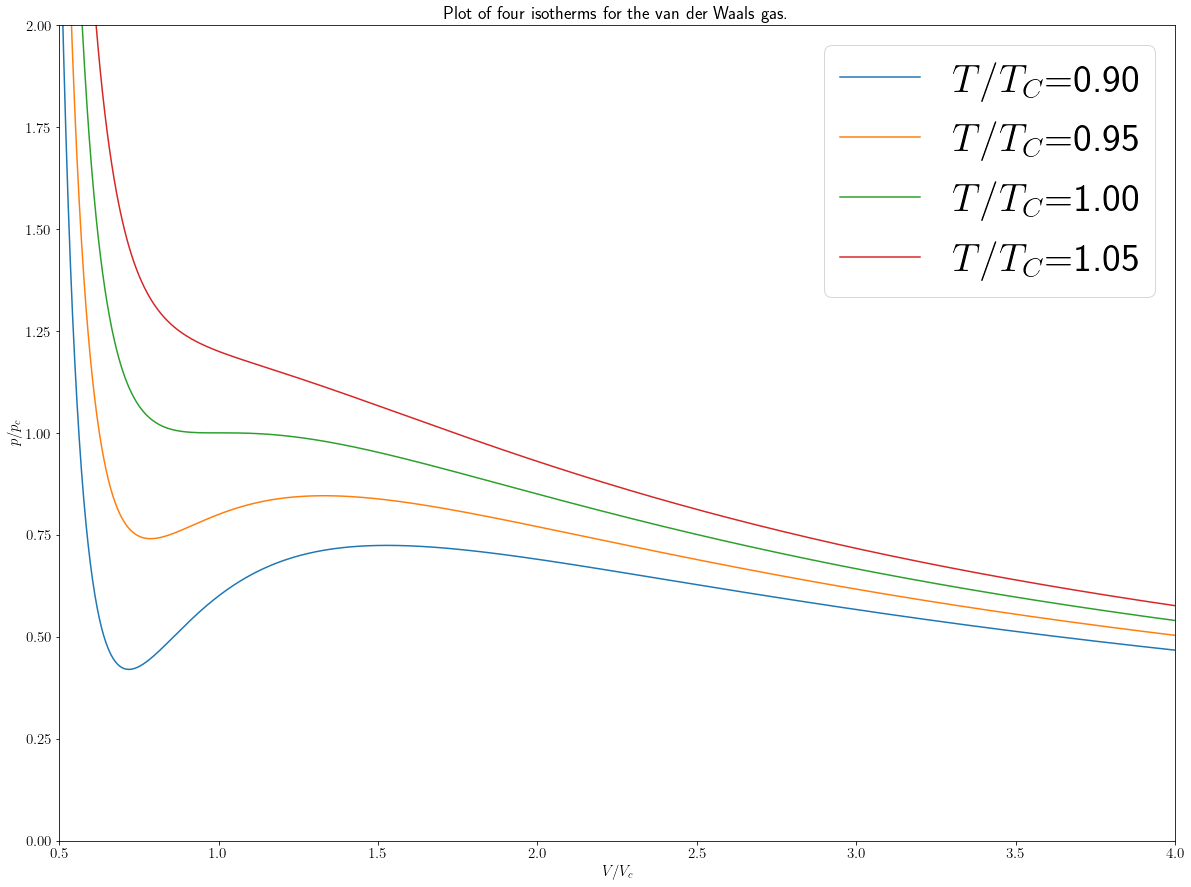

In [25]:
That = [0.9,0.95,1.0,1.05]
V = np.linspace(0.5,4.0,1000)

for i in range(len(That)):
    T = That[i]
    p = 8.0/3.0*T/(V-1/3)-3.0/(V**2)
    plt.plot(V,p,label=r'$T/T_C$=%0.2f'%T)
plt.xlabel(r'$V/V_c$')
plt.ylabel(r'$p/p_c$')
plt.ylim(0,2)
plt.xlim(0.5,4)
plt.legend()
plt.title('Plot of four isotherms for the van der Waals gas.')
plt.show()

# $\varphi=\varphi_0[(\frac{r_o}{r})^{12} - 2(\frac{r_o}{r})^6]$

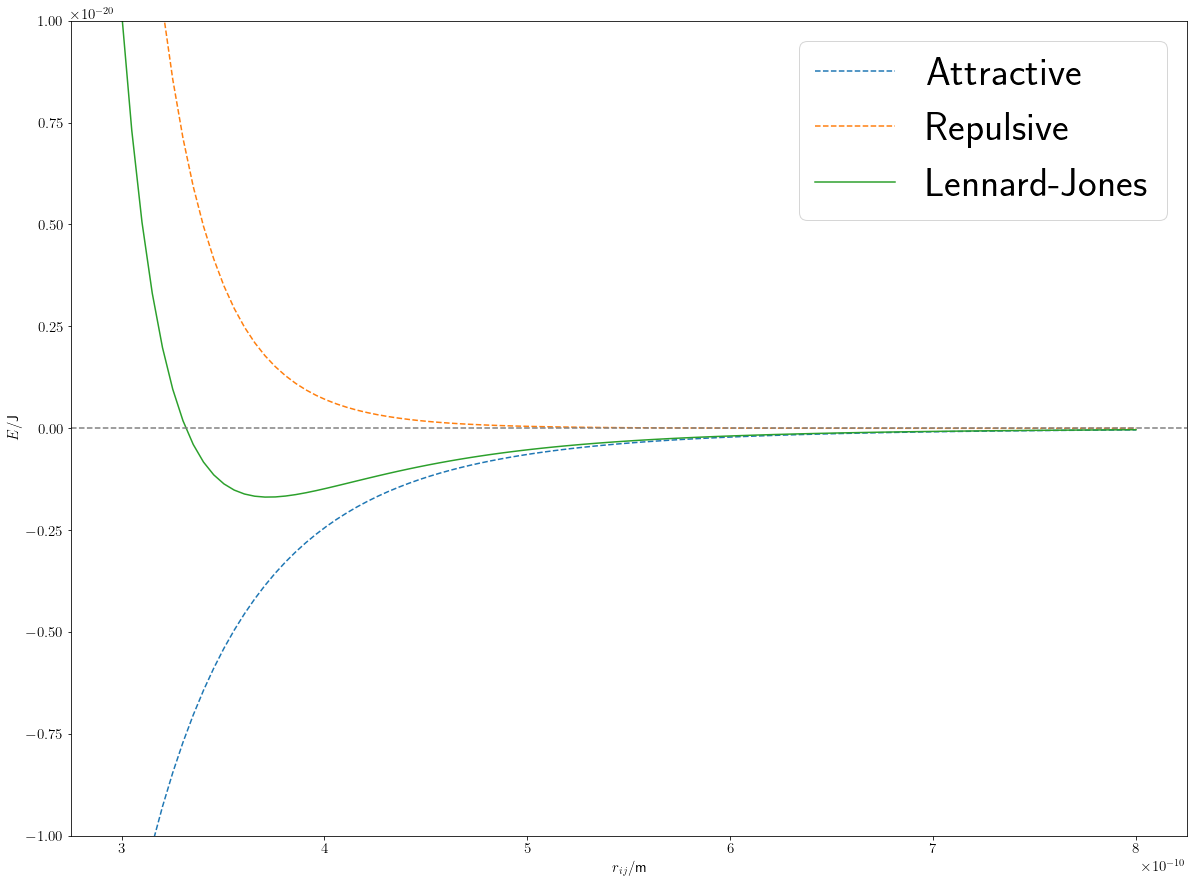

In [75]:
def attractive(dr, b):
    return  -b /dr**6

def repulsive(dr, a):
    return  a /dr**12

def lj(dr, constants):
    return (repulsive(dr, constants[0]) + attractive(dr, constants[1]))
E=8.854187817e-12
r = np.linspace(3e-10, 8e-10, 100)
plt.plot(r, attractive(r, 10.e-78),'--', label='Attractive')
plt.plot(r, repulsive(r, 1.2e-134),'--', label='Repulsive')
plt.plot(r, lj(r, [1.2e-134, 9.e-78]), label='Lennard-Jones')
plt.axhline(0, color='grey', linestyle='--')
plt.xlabel(r'$r_{ij}$/m')
plt.ylabel(r'$E$/J')
plt.ylim(-1e-20,1e-20)
plt.legend()
plt.show()

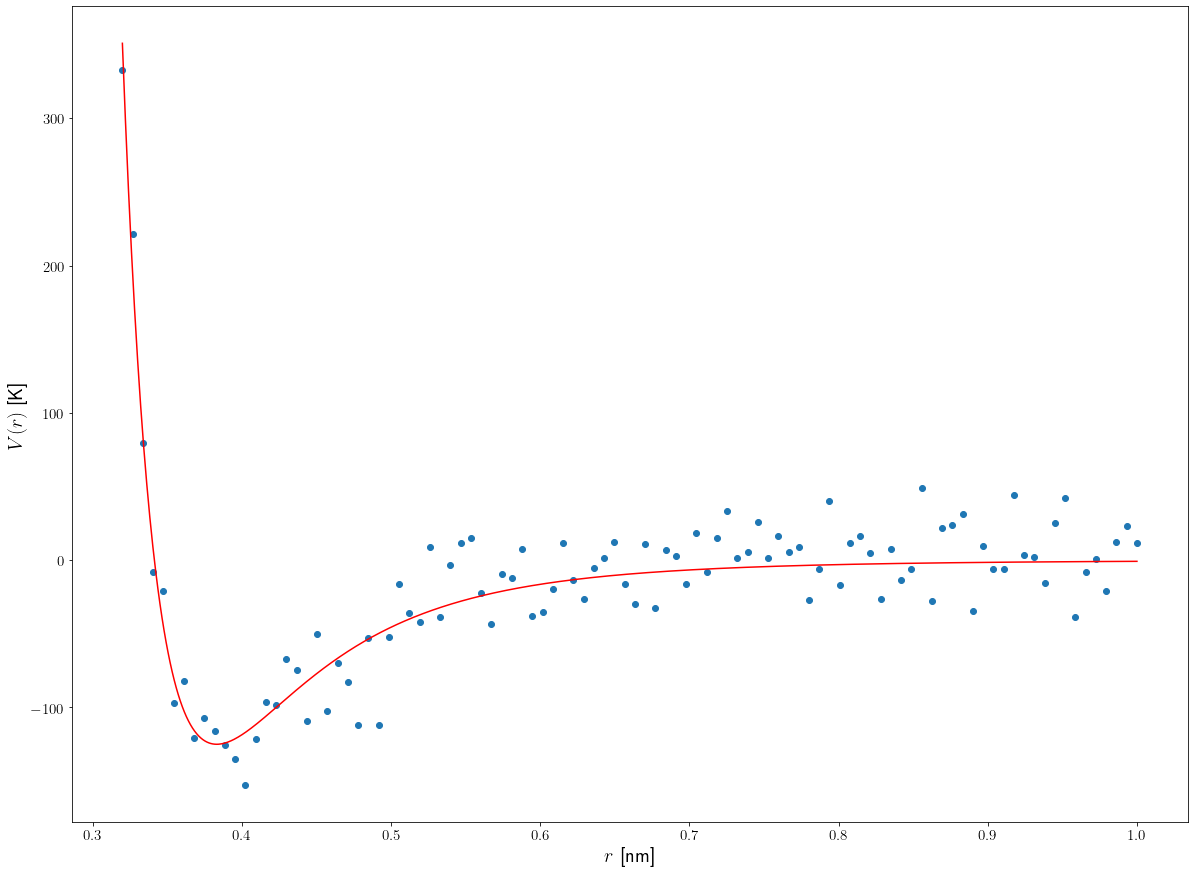

In [89]:
r_data, V_data = np.loadtxt('../youtube_channel-main/Data/curvefite2.txt')
r_data*=1e9
V_data/=1.38e-23

def model_f(r, sigma, epsilon):
    return 4*epsilon*((sigma/r)**12-(sigma/r)**6)
# Obtain initial guesses
eps_init_guess = 120
sig_init_guess = 2**(-1/6) * 0.4
#Get the optimal parameters
popt, pcov = curve_fit(model_f, r_data, V_data, p0=[sig_init_guess,
                                                    eps_init_guess])
sig_opt, eps_opt = popt
#Lets plot data next to model

r_model = np.linspace(min(r_data), max(r_data), 1000)
V_model = model_f(r_model, sig_opt, eps_opt)
plt.scatter(r_data, V_data)
plt.plot(r_model, V_model, color='r')
plt.xlabel('$r$ [nm]', fontsize=20)
plt.ylabel('$V(r)$ [K]', fontsize=20)
plt.show()

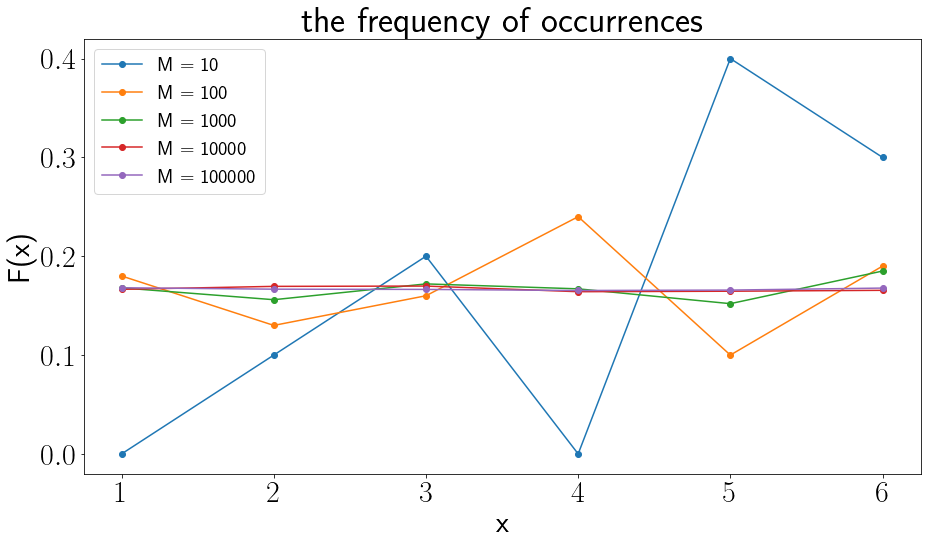

In [18]:
Mval = array([10,100,1000,10000,100000])
nM = len(Mval)
for im in range(nM):
    M = Mval[im]
    m = np.random.randint(0,6,M)+1
    [Nx,edges] = histogram(m,6,range=(0.5,6.5))
    Fx = Nx/M
    x = (edges[1:]+edges[:-1])/2
    plt.plot(x,Fx,'-o',label='M = %i'%M)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('the frequency of occurrences')
plt.legend()
plt.show()